Petra Maciel and Jesus Maciel

---
**🚨 Important Note 🚨**

If you've run one of the models in this notebook and wish to run a subsequent model, please **restart the runtime first**. Running multiple models consecutively without restarting can lead to memory issues and may cause the Colab session to crash.

To restart the runtime:
- Click on the `Runtime` menu at the top.
- Select `Restart runtime...`.
- After restarting, you can proceed with running the next model.

Thank you for your understanding!
---


---
**📘 Notebook Contents 📘**

This notebook presents the original model with the dataset used in the referenced book. In addition, we have expanded the notebook to include three other datasets sourced from Kaggle:

1. **Twitter Data**
2. **Stock Data**
3. **Climate Data**

Each dataset is accompanied by a model in a distinct cell. When you run a cell, you execute the entire model for that specific dataset.

To avoid memory or runtime issues, it's recommended to run only one model at a time and restart the runtime before proceeding with the next model, as noted in the previous disclaimer.


---



## **Original dataset in book**

Loading the IMDB dataset...

Decoding the first review back to text...
1641221/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown u

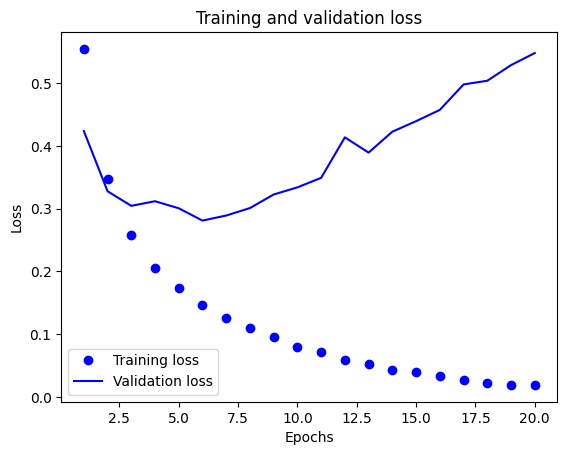


Plotting the training and validation accuracy...


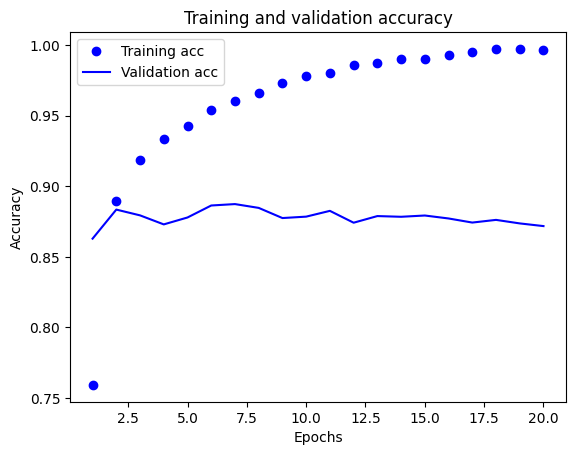


Retraining a model from scratch...
Epoch 1/4
49/49 [==============================] - 3s 35ms/step - loss: 0.5364 - accuracy: 0.7463
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.3115 - accuracy: 0.8982
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2256 - accuracy: 0.9248
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2858 - accuracy: 0.8866

Evaluation results: [0.28580501675605774, 0.8866000175476074]

Generating predictions on test data...
782/782 [==============================] - 2s 2ms/step
[[0.171431  ]
 [0.9999718 ]
 [0.946531  ]
 ...
 [0.14514488]
 [0.07481979]
 [0.56358224]]


In [ ]:
# The IMDB dataset

print("Loading the IMDB dataset...")
# Loading the IMDB dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

# Decoding reviews back to text
print("\nDecoding the first review back to text...")
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

print("\nPreparing the data...")
# Preparing the data
# Encoding the integer sequences via multi-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


print("\nBuilding the model...")
# Building your model
# Model definition
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

print("\nSetting aside a validation set...")
# Validating your approach
# Setting aside a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


print("\nTraining the model...")
# Training your model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
print("Keys in history dict:", history_dict.keys())

print("\nPlotting the training and validation loss...")
# Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

print("\nPlotting the training and validation accuracy...")
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("\nRetraining a model from scratch...")
# Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

print("\nEvaluation results:", results)

print("\nGenerating predictions on test data...")
# Using a trained model to generate predictions on new data
predictions = model.predict(x_test)
print(predictions)


# *Twitter Data*
- Using Adam optimizer
- Using hinge loss function

The dataset has three sentiments namely, negative(-1), neutral(0), and positive(+1). It contains two fields for the tweet and label.

Importing dataset using pandas...

Cleaning up the dataset...

Initializing a tokenizer...

Encoding the clean_text column...

Selecting relevant columns...

Splitting the data into training and testing sets...

Converting the data to numpy arrays...

Filtering out empty sequences from training and testing sets...


<ipython-input-7-2b5612876976>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_data = np.array(test_data)



Encoding the integer sequences via multi-hot encoding...
NaN in partial_x_train: False
NaN in partial_y_train: False

Building the model...

Compiling the model...

Splitting the dataset into training and validation sets...

Training the model...
Epoch 1/20
30/30 [==============================] - 3s 88ms/step - loss: 0.8141 - accuracy: 0.6432 - val_loss: 0.7999 - val_accuracy: 0.6674
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.7561 - accuracy: 0.6745 - val_loss: 0.7295 - val_accuracy: 0.6674
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.6848 - accuracy: 0.6751 - val_loss: 0.6799 - val_accuracy: 0.6685
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.6285 - accuracy: 0.7249 - val_loss: 0.6256 - val_accuracy: 0.7777
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.5426 - accuracy: 0.8714 - val_loss: 0.5620 - val_accuracy: 0.8445
Epoch 6/20
30/30 [=============================

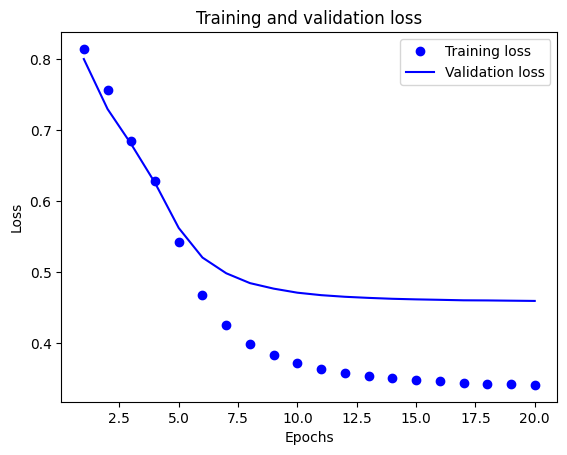


Plotting the training and validation accuracy...


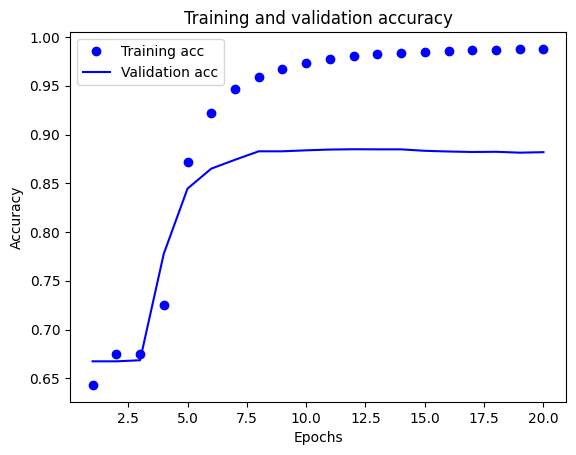


Retraining a model from scratch...
Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.7467 - accuracy: 0.6694
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.6630 - accuracy: 0.6717
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.6408 - accuracy: 0.6838
Epoch 4/4
674/674 [==============================] - 2s 3ms/step - loss: 0.5068 - accuracy: 0.8747

Evaluation results: [0.5068392753601074, 0.8746752142906189]

Generating predictions on test data...
674/674 [==============================] - 1s 2ms/step
[[0.8484154 ]
 [0.9155753 ]
 [0.9860301 ]
 ...
 [0.9868211 ]
 [0.19876853]
 [0.91170746]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Importing dataset using pandas...")
# import dataset using pandas
df = pd.read_csv("/content/Twitter_Data.csv")

print("\nCleaning up the dataset...")
# remove neutral responses
df = df[df['category'] != 0.0]
# drop missing values
df = df.dropna(subset=['clean_text'])
df = df.dropna(subset=['category'])
# Reset index as the above
df.reset_index(drop=True, inplace=True)
# replace -1.0 with 0 for negative responses
df['category'] = df['category'].replace(-1.0, 0)
# replace 1.0 with 1 for positive responses
df['category'] = df['category'].replace(1.0, 1)

print("\nInitializing a tokenizer...")
# Initialize a tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)  # Consider the top 10,000 words in the dataset

# Fit the tokenizer on the clean_text column
tokenizer.fit_on_texts(df['clean_text'])

print("\nEncoding the clean_text column...")
# Convert the clean_text column into integer sequences and put it in new column named endcoded_text
df['encoded_text'] = tokenizer.texts_to_sequences(df['clean_text'])

print("\nSelecting relevant columns...")
# select only the category and encoded text columns
df = df[['category', 'encoded_text']]

print("\nSplitting the data into training and testing sets...")
# Use sklearn library to split data
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['encoded_text'].tolist(),
    df['category'].tolist(),
    test_size=0.2,
    random_state=42
)

print("\nConverting the data to numpy arrays...")
# Convert the data to numpy arrays
train_data = np.array(train_data, dtype=object)
test_data = np.array(test_data)
train_labels = np.array(train_labels, dtype=object)
test_labels = np.array(test_labels)

print("\nFiltering out empty sequences from training and testing sets...")
# Filtering out empty sequences
filtered_data, filtered_labels = zip(*[(seq, label) for seq, label in zip(train_data, train_labels) if seq])
# Convert back to lists
train_data = list(filtered_data)
train_labels = list(filtered_labels)

# Filtering out empty sequences
filtered_data, filtered_labels = zip(*[(seq, label) for seq, label in zip(test_data, test_labels) if seq])
# Convert back to lists
test_data = list(filtered_data)
test_labels = list(filtered_labels)

print("\nEncoding the integer sequences via multi-hot encoding...")
# **Encoding the integer sequences via multi-hot encoding**
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Check for NaN values in partial_x_train and partial_y_train
nan_in_x_train = np.isnan(x_train).any()
nan_in_y_train = np.isnan(y_train).any()

print("NaN in partial_x_train:", nan_in_x_train)
print("NaN in partial_y_train:", nan_in_y_train)

print("\nBuilding the model...")
# Building your model
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

print("\nCompiling the model...")
# compiling the model
model.compile(optimizer="adam",
              loss="hinge",
              metrics=["accuracy"])

print("\nSplitting the dataset into training and validation sets...")
# validating approach

# Reduce both the data and labels to match the original data's size
x_train = x_train[:25000]
y_train = y_train[:25000]

# Split the reduced dataset into training and validation sets
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("\nTraining the model...")
# training your model:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

print("\nPlotting training and validation loss...")
# plotting training and validation loss
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

print("\nPlotting the training and validation accuracy...")
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("\nRetraining a model from scratch...")
# Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="hinge",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

# look at results of trained model
print("\nEvaluation results:", results)

print("\nGenerating predictions on test data...")
# Using a trained model to generate predictions on new data
predictions = model.predict(x_test)
print(predictions)


# *Stock Data*
- Using SGD (Stochastic Gradient Descent) optimizer
- Using squared_hinge loss function

Gathered Stock news from Multiple twitter Handles regarding Economic news dividing into two parts : Negative(-1) and positive(1) .
* Negative count: 2,106
* Positive count: 3,685

Importing dataset using pandas...
Unique Sentiments in the dataset: [ 1 -1]

Cleaning up the dataset...

Initializing a tokenizer...

Fitting the tokenizer on the Text column...

Encoding the Text column...

Selecting relevant columns...

Splitting the data into training and testing sets...

Converting the data to numpy arrays...

Filtering out empty sequences from training and testing sets...

Encoding the integer sequences via multi-hot encoding...


<ipython-input-8-53a978b14797>:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_data = np.array(test_data)


NaN in partial_x_train: False
NaN in partial_y_train: False

Building the model...

Compiling the model...

Splitting the dataset into training and validation sets...

Training the model...
Epoch 1/20
8/8 [==============================] - 1s 71ms/step - loss: 0.9760 - accuracy: 0.6375 - val_loss: 0.9998 - val_accuracy: 0.6278
Epoch 2/20
8/8 [==============================] - 0s 34ms/step - loss: 0.9737 - accuracy: 0.6151 - val_loss: 0.9976 - val_accuracy: 0.5912
Epoch 3/20
8/8 [==============================] - 0s 28ms/step - loss: 0.9717 - accuracy: 0.5563 - val_loss: 0.9958 - val_accuracy: 0.5577
Epoch 4/20
8/8 [==============================] - 0s 38ms/step - loss: 0.9700 - accuracy: 0.5061 - val_loss: 0.9940 - val_accuracy: 0.5156
Epoch 5/20
8/8 [==============================] - 0s 30ms/step - loss: 0.9683 - accuracy: 0.4605 - val_loss: 0.9922 - val_accuracy: 0.4822
Epoch 6/20
8/8 [==============================] - 0s 36ms/step - loss: 0.9666 - accuracy: 0.4132 - val_loss: 0.9907

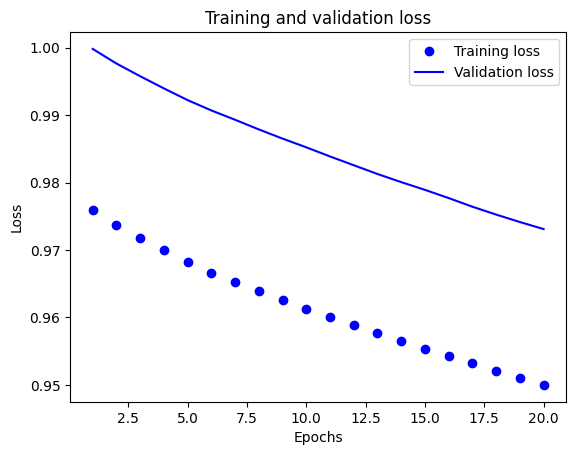


Plotting the training and validation accuracy...


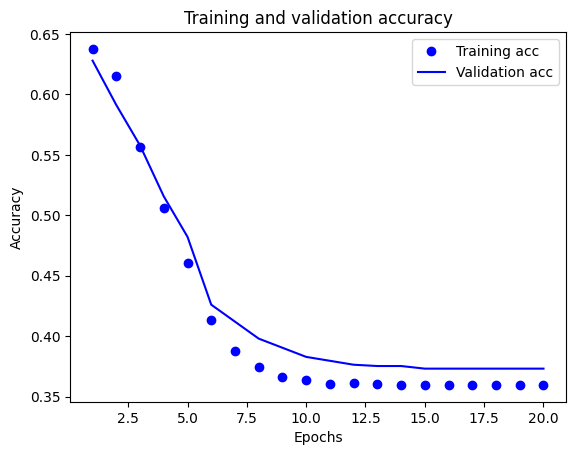


Retraining a model from scratch...
Epoch 1/4
10/10 [==============================] - 1s 39ms/step - loss: 0.6803 - accuracy: 0.6170
Epoch 2/4
10/10 [==============================] - 0s 35ms/step - loss: 0.6447 - accuracy: 0.6656
Epoch 3/4
10/10 [==============================] - 0s 33ms/step - loss: 0.6097 - accuracy: 0.7098
Epoch 4/4
37/37 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.7532

Evaluation results: [0.5763904452323914, 0.7532355189323425]

Generating predictions on test data...
37/37 [==============================] - 0s 2ms/step
[[0.5623208 ]
 [0.59355956]
 [0.72079515]
 ...
 [0.63990945]
 [0.4231665 ]
 [0.5741623 ]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Importing dataset using pandas...")
# import dataset using pandas
df = pd.read_csv("/content/stock_data.csv")
print("Unique Sentiments in the dataset:", df['Sentiment'].unique())

print("\nCleaning up the dataset...")
# drop missing values
df = df.dropna(subset=['Sentiment'])
df = df.dropna(subset=['Text'])
# Reset index as the above
df.reset_index(drop=True, inplace=True)
# replace -1.0 with 0 for negative responses
df['Sentiment'] = df['Sentiment'].replace(-1.0, 0)

print("\nInitializing a tokenizer...")
# Initialize a tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)  # Consider the top 10,000 words in the dataset

print("\nFitting the tokenizer on the Text column...")
# Fit the tokenizer on the clean_text column
tokenizer.fit_on_texts(df['Text'])

print("\nEncoding the Text column...")
# Convert the clean_text column into integer sequences and put it in new column named endcoded_text
df['encoded_text'] = tokenizer.texts_to_sequences(df['Text'])

print("\nSelecting relevant columns...")
# select only the category and encoded text columns
df = df[['Sentiment', 'encoded_text']]

print("\nSplitting the data into training and testing sets...")
# Use sklearn library to split data
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['encoded_text'].tolist(),
    df['Sentiment'].tolist(),
    test_size=0.2,
    random_state=42
)

print("\nConverting the data to numpy arrays...")
# Convert the data to numpy arrays
train_data = np.array(train_data, dtype=object)
test_data = np.array(test_data)
train_labels = np.array(train_labels, dtype=object)
test_labels = np.array(test_labels)

print("\nFiltering out empty sequences from training and testing sets...")
# Filtering out empty sequences
filtered_data, filtered_labels = zip(*[(seq, label) for seq, label in zip(train_data, train_labels) if seq])
# Convert back to lists
train_data = list(filtered_data)
train_labels = list(filtered_labels)

# Filtering out empty sequences
filtered_data, filtered_labels = zip(*[(seq, label) for seq, label in zip(test_data, test_labels) if seq])
# Convert back to lists
test_data = list(filtered_data)
test_labels = list(filtered_labels)

print("\nEncoding the integer sequences via multi-hot encoding...")
# **Encoding the integer sequences via multi-hot encoding**
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Check for NaN values in partial_x_train and partial_y_train
nan_in_x_train = np.isnan(x_train).any()
nan_in_y_train = np.isnan(y_train).any()

print("NaN in partial_x_train:", nan_in_x_train)
print("NaN in partial_y_train:", nan_in_y_train)

print("\nBuilding the model...")
# Building your model
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

print("\nCompiling the model...")
# compiling the model
model.compile(optimizer="sgd",
              loss="squared_hinge",
              metrics=["accuracy"])

print("\nSplitting the dataset into training and validation sets...")
# This part was changed from the twitter model
# Calculate the number of samples in the dataset
total_samples = len(x_train)

# Calculate the split index for an 80-20 split
split_index = int(0.8 * total_samples)

# Split the dataset into training and validation sets
partial_x_train = x_train[:split_index]
x_val = x_train[split_index:]
partial_y_train = y_train[:split_index]
y_val = y_train[split_index:]

print("\nTraining the model...")
# training your model:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

print("\nPlotting training and validation loss...")
# plotting training and validation loss
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

print("\nPlotting the training and validation accuracy...")
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("\nRetraining a model from scratch...")
# Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

# look at results of trained model
print("\nEvaluation results:", results)

print("\nGenerating predictions on test data...")
# Using a trained model to generate predictions on new data
predictions = model.predict(x_test)
print(predictions)


# *Climate Data*
- Using ftrl optimizer
- Using Mean Absolute Error (MAE) Loss function

This dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were annotated. Each tweet is labelled independently by 3 reviewers. This dataset only contains tweets that all 3 reviewers agreed on (the rest were discarded).

Importing climate dataset using pandas...

Cleaning up the dataset...

Initializing a tokenizer...

Fitting the tokenizer on the message column...

Encoding the message column...

Selecting relevant columns...

Splitting the data into training and testing sets...

Converting the data to numpy arrays...

Filtering out empty sequences from training and testing sets...

Encoding the integer sequences via multi-hot encoding...


<ipython-input-9-2f85aa5cf797>:57: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_data = np.array(test_data)


NaN in partial_x_train: False
NaN in partial_y_train: False

Building the model...

Compiling the model...

Splitting the dataset into training and validation sets...

Training the model...
Epoch 1/20
23/23 [==============================] - 3s 95ms/step - loss: 0.4991 - accuracy: 0.8491 - val_loss: 0.4989 - val_accuracy: 0.8477
Epoch 2/20
23/23 [==============================] - 1s 41ms/step - loss: 0.4985 - accuracy: 0.8518 - val_loss: 0.4982 - val_accuracy: 0.8477
Epoch 3/20
23/23 [==============================] - 1s 38ms/step - loss: 0.4979 - accuracy: 0.8518 - val_loss: 0.4977 - val_accuracy: 0.8477
Epoch 4/20
23/23 [==============================] - 1s 39ms/step - loss: 0.4975 - accuracy: 0.8518 - val_loss: 0.4973 - val_accuracy: 0.8477
Epoch 5/20
23/23 [==============================] - 1s 40ms/step - loss: 0.4970 - accuracy: 0.8518 - val_loss: 0.4969 - val_accuracy: 0.8477
Epoch 6/20
23/23 [==============================] - 1s 37ms/step - loss: 0.4967 - accuracy: 0.8518 - val_

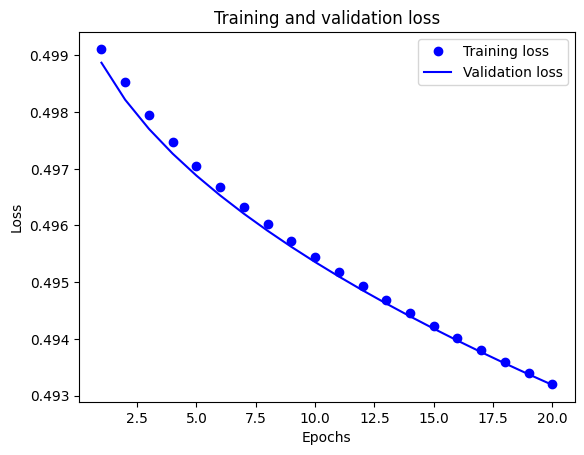


Plotting the training and validation accuracy...


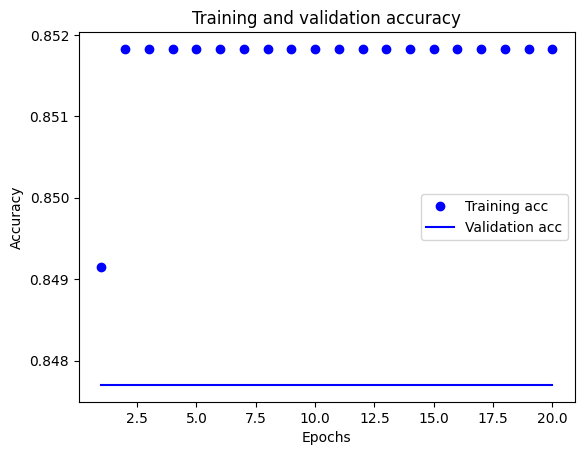


Retraining a model from scratch...
Epoch 1/4
43/43 [==============================] - 2s 30ms/step - loss: 0.4991 - accuracy: 0.8361
Epoch 2/4
43/43 [==============================] - 2s 35ms/step - loss: 0.4978 - accuracy: 0.8499
Epoch 3/4
43/43 [==============================] - 1s 32ms/step - loss: 0.4970 - accuracy: 0.8499
Epoch 4/4
169/169 [==============================] - 1s 2ms/step - loss: 0.4959 - accuracy: 0.8601

Evaluation results: [0.4959253668785095, 0.8601372838020325]

Generating predictions on test data...
169/169 [==============================] - 0s 2ms/step
[[0.50565714]
 [0.50565714]
 [0.50565714]
 ...
 [0.50565714]
 [0.50565714]
 [0.50565714]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Importing climate dataset using pandas...")
# import dataset using pandas
df = pd.read_csv("/content/climate_data.csv")

print("\nCleaning up the dataset...")
# drop tweet id column
df = df.drop("tweetid", axis=1)

# remove rows with 2(News): the tweet links to factual news about climate change
df = df[df['sentiment'] != 2]
# remove rows with 0(Neutral: the tweet neither supports nor refutes the belief of man-made climate change
df = df[df['sentiment'] != 0.0]
# drop missing values
df = df.dropna(subset=['sentiment'])
df = df.dropna(subset=['message'])
# Reset index as the above
df.reset_index(drop=True, inplace=True)
# replace -1.0 with 0 for negative responses(does not believe in climate change)
df['sentiment'] = df['sentiment'].replace(-1.0, 0)

print("\nInitializing a tokenizer...")
# Initialize a tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000)  # Consider the top 10,000 words in the dataset

print("\nFitting the tokenizer on the message column...")
# Fit the tokenizer on the message column
tokenizer.fit_on_texts(df['message'])

print("\nEncoding the message column...")
# Convert the message column into integer sequences and put it in new column named endcoded_text
df['encoded_text'] = tokenizer.texts_to_sequences(df['message'])

print("\nSelecting relevant columns...")
# select only the category and encoded text columns
df = df[['sentiment', 'encoded_text']]

print("\nSplitting the data into training and testing sets...")
# Use sklearn library to split data
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['encoded_text'].tolist(),
    df['sentiment'].tolist(),
    test_size=0.2,
    random_state=42
)

print("\nConverting the data to numpy arrays...")
# Convert the data to numpy arrays
train_data = np.array(train_data, dtype=object)
test_data = np.array(test_data)
train_labels = np.array(train_labels, dtype=object)
test_labels = np.array(test_labels)

print("\nFiltering out empty sequences from training and testing sets...")
# Filtering out empty sequences
filtered_data, filtered_labels = zip(*[(seq, label) for seq, label in zip(train_data, train_labels) if seq])
# Convert back to lists
train_data = list(filtered_data)
train_labels = list(filtered_labels)

# Filtering out empty sequences
filtered_data, filtered_labels = zip(*[(seq, label) for seq, label in zip(test_data, test_labels) if seq])
# Convert back to lists
test_data = list(filtered_data)
test_labels = list(filtered_labels)

print("\nEncoding the integer sequences via multi-hot encoding...")
# **Encoding the integer sequences via multi-hot encoding**
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# Check for NaN values in partial_x_train and partial_y_train
nan_in_x_train = np.isnan(x_train).any()
nan_in_y_train = np.isnan(y_train).any()

print("NaN in partial_x_train:", nan_in_x_train)
print("NaN in partial_y_train:", nan_in_y_train)

print("\nBuilding the model...")
# Building your model
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

print("\nCompiling the model...")
# compiling the model
model.compile(optimizer="ftrl",
              loss="mean_absolute_error",
              metrics=["accuracy"])

print("\nSplitting the dataset into training and validation sets...")
# Reduce both the data and labels to match the original data's size
x_train = x_train[:25000]
y_train = y_train[:25000]

# Split the reduced dataset into training and validation sets
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("\nTraining the model...")
# training your model:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

print("\nPlotting training and validation loss...")
# plotting training and validation loss
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

print("\nPlotting the training and validation accuracy...")
# Plotting the training and validation accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("\nRetraining a model from scratch...")
# Retraining a model from scratch
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="ftrl",
              loss="mean_absolute_error",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

# look at results of trained model
print("\nEvaluation results:", results)

print("\nGenerating predictions on test data...")
# Using a trained model to generate predictions on new data
predictions = model.predict(x_test)
print(predictions)
